# Guia regresión 
## Consigna
Para el dataset a continuación, calcular la regresión polinómica e ir variando el orden hasta obtener el resultado óptimo de AIC y BIC. También calcular $ R^2 $ y los p values.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

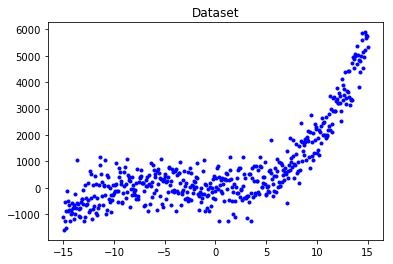

In [2]:
# datos
x = np.load('X.npy')
y = np.load('y.npy')

plt.figure()
plt.plot(x, y,'.',  color='blue')
plt.title('Dataset')
plt.show()

In [3]:
# armo un dataframe con los datos
df = pd.DataFrame({'x':x, 'y':y})

# agrego las potencias de los x para hacer las regresiones polinómicas
N = 10 # orden máxima de polinomios a probar
df_aux = pd.DataFrame(columns = ['x1'])
df_aux['x1'] = df['x']
for i in range(2,N+1):
    indice = 'x' + str(i)
    tmp_df = pd.DataFrame(columns = [indice])
    tmp_df[indice] = df['x']**i
    df_aux = pd.concat([df_aux,tmp_df], axis=1)

df_aux = pd.concat([df_aux,df['y']], axis=1)

# separo el df en entrenamiento y prueba (70 % para entrenamiento)
msk = np.random.rand(len(df)) < 0.7

df_train = df_aux[msk]
df_test = df_aux[~msk]

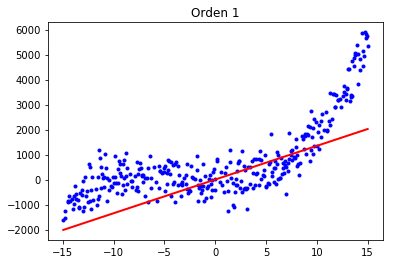

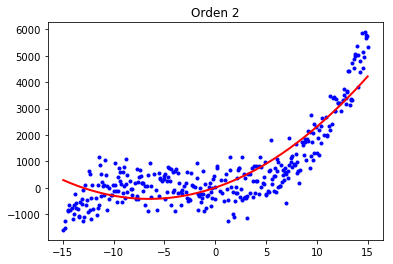

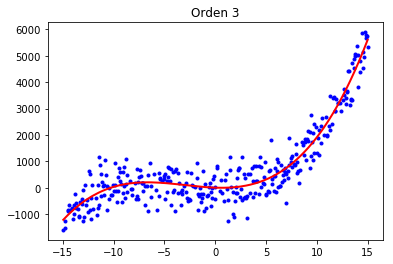

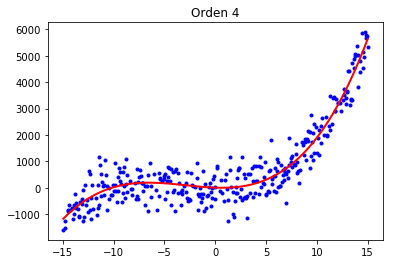

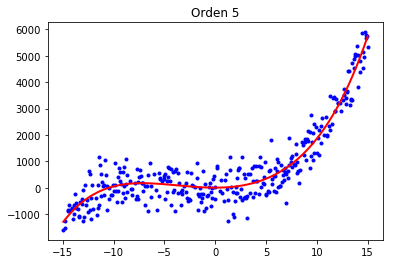

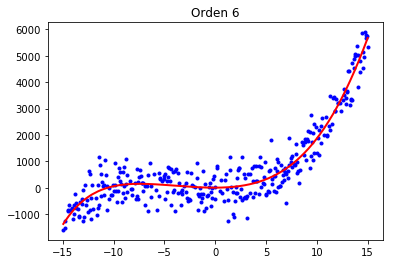

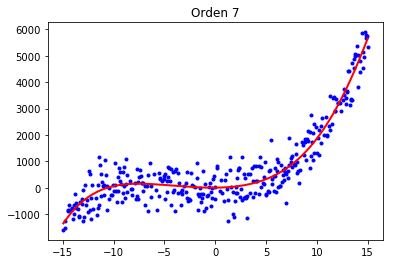

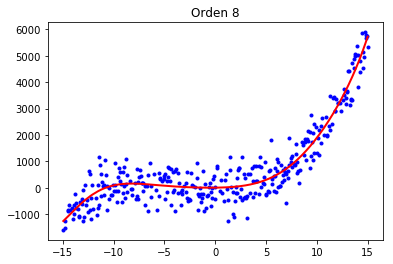

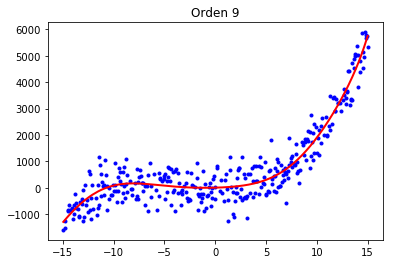

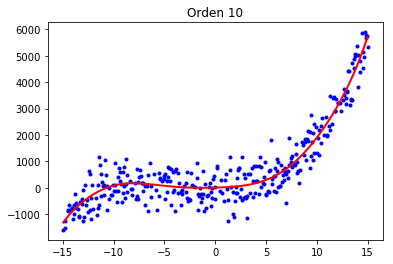

In [4]:
# analizo cada topología para ver cual se ajusta mejor
resultados = pd.DataFrame(columns=['Poly_order','AIC','BIC','R-Squared'])

for N in range (1,11):
    Xn = df_train.iloc[:,0:N]
    Xn = Xn.iloc[:,:].values
    y1 = df_train['y']

    #modelo
    model = sm.OLS(y1, Xn).fit()

    # Resultados
    print('=================================================================================')    
    plt.figure()
    plt.plot(df_train['x1'], df_train['y'],'.',  color='blue')
    plt.plot(df_train['x1'], model.predict(), c='red', linewidth=2)
    plt.title('Orden '+ str(N))
    plt.show()
    
    resultados = resultados.append({'Poly_order':N,'AIC':model.aic,'BIC':model.bic,'R-Squared':model.rsquared},ignore_index=True)


In [5]:
print(resultados)

   Poly_order          AIC          BIC  R-Squared
0         1.0  6002.274191  6006.134978   0.465786
1         2.0  5637.613729  5645.335301   0.812049
2         3.0  5358.119509  5369.701867   0.915715
3         4.0  5359.923866  5375.367010   0.915762
4         5.0  5360.374700  5379.678631   0.916133
5         6.0  5361.766319  5384.931036   0.916278
6         7.0  5363.732580  5390.758084   0.916286
7         8.0  5365.061493  5395.947783   0.916446
8         9.0  5366.974808  5401.721884   0.916467
9        10.0  5368.928871  5407.536733   0.916478


# El modelo polinomial con los mejores AIC y BIC es el de orden 3

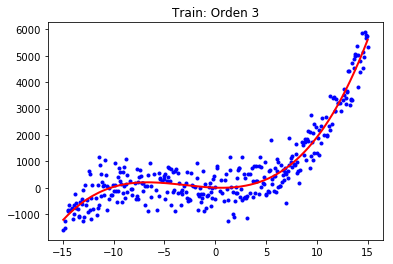

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1260.
Date:                Tue, 01 May 2018   Prob (F-statistic):          1.72e-186
Time:                        15:12:54   Log-Likelihood:                -2676.1
No. Observations:                 351   AIC:                             5358.
Df Residuals:                     348   BIC:                             5370.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           -13.5490      7.621     -1.778      0.0

In [6]:
N = 3
Xn = df_train.iloc[:,0:N]
Xn = Xn.iloc[:,:].values
y1 = df_train['y']

#modelo
model = sm.OLS(y1, Xn).fit()

# Resultados
plt.figure()
plt.plot(df_train['x1'], df_train['y'],'.',  color='blue')
plt.plot(df_train['x1'], model.predict(), c='red', linewidth=2)
plt.title('Train: Orden '+ str(N))
plt.show()

print(model.summary())
print()
print('PValues:')
print(model.pvalues)

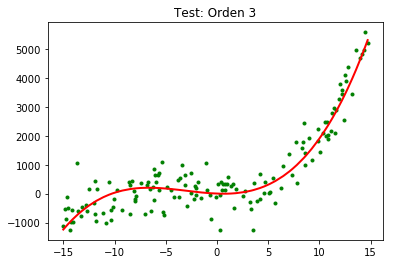

In [7]:
# Veo como performa con los datos de testing
Xn_test = df_test.iloc[:,0:N]
Xn_test = Xn_test.iloc[:,:].values
y1_test = df_test['y']

# Resultados
plt.figure()
plt.plot(df_test['x1'], df_test['y'],'.',  color='green')
plt.plot(df_test['x1'], model.predict(Xn_test), c='red', linewidth=2)
plt.title('Test: Orden '+ str(N))
plt.show()